In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [9]:
# Read JSON file
with open('counts/inmate_counts_race.json', 'r') as file:
    data = json.load(file)

race_counts = data["counts"]

In [27]:
# Extract race types and counts using nested list comprehension
race_data = [(entry['Date'], [(race_type, entry[race_type]) for race_type in entry if race_type != 'Date']) for entry in race_counts]

In [28]:
# Aggregate counts by month
from collections import defaultdict
from datetime import datetime

monthly_counts = defaultdict(lambda: defaultdict(int))

In [29]:
for entry in race_counts:
    date = datetime.strptime(entry['Date'], '%Y-%m-%d')
    month_key = date.strftime('%Y-%m')
    
    for race_type, count in entry.items():
        if race_type != 'Date':
            monthly_counts[month_key][race_type] = max(monthly_counts[month_key][race_type], count)

# Plot the data
months = sorted(monthly_counts.keys())
race_types = list(race_counts[0].keys())[:-1]

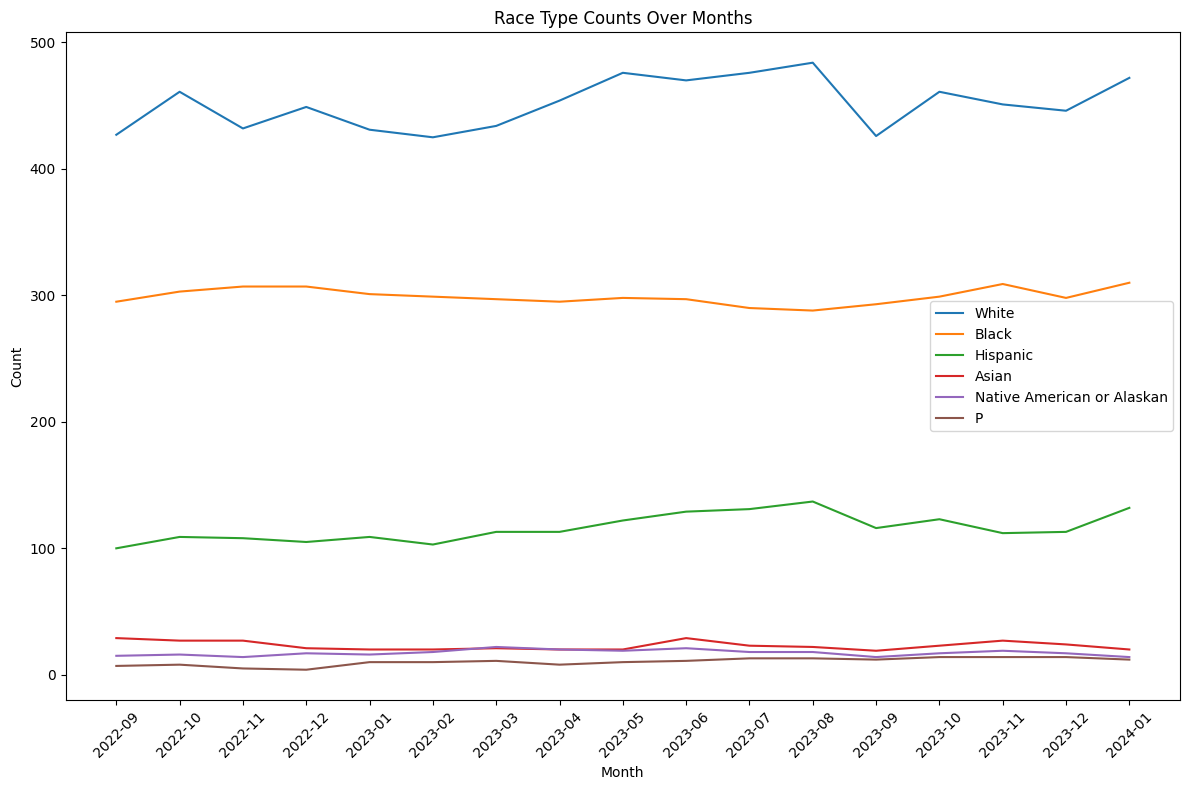

In [30]:
plt.figure(figsize=(12, 8))

for race_type in race_types:
    counts = [monthly_counts[month].get(race_type, 0) for month in months]
    plt.plot(months, counts, label=race_type)

plt.title('Race Type Counts Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()